In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import os
from IPython.display import Audio, display
from tqdm import tqdm
import soundfile as sf

In [160]:
df=pd.read_csv('./UrbanSound8K.csv')

In [162]:
df.head()

slice_file_name    fsID  start        end  salience  fold  classID  \
0    100032-3-0-0.wav  100032    0.0   0.317551         1     5        3   
1  100263-2-0-117.wav  100263   58.5  62.500000         1     5        2   
2  100263-2-0-121.wav  100263   60.5  64.500000         1     5        2   
3  100263-2-0-126.wav  100263   63.0  67.000000         1     5        2   
4  100263-2-0-137.wav  100263   68.5  72.500000         1     5        2   

              class  
0          dog_bark  
1  children_playing  
2  children_playing  
3  children_playing  
4  children_playing

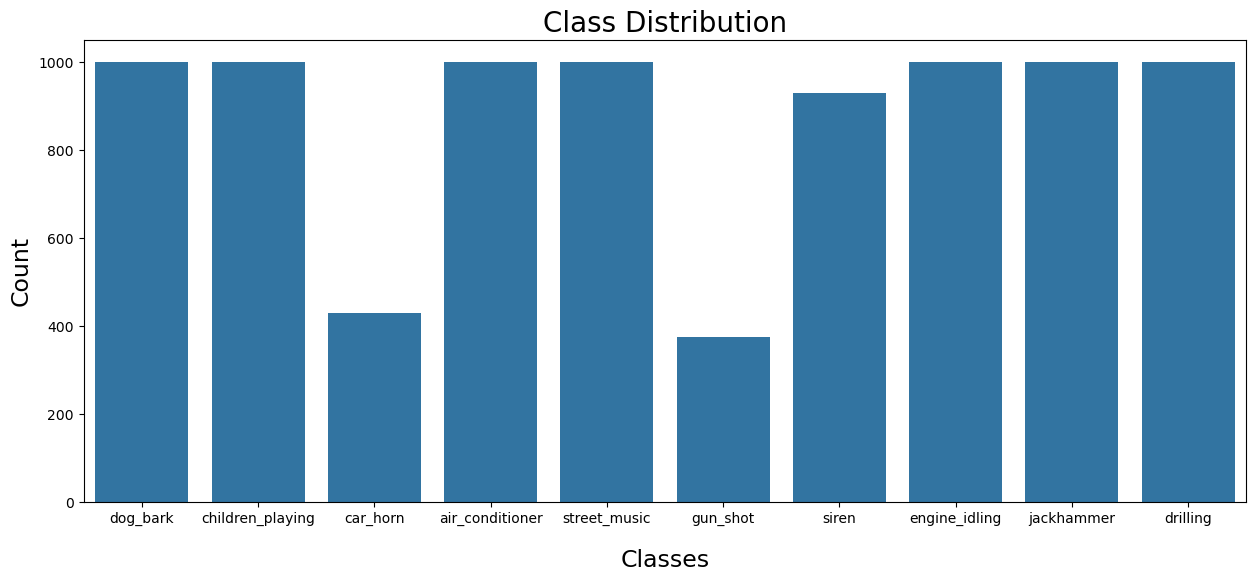

In [164]:
plt.figure(figsize=(15, 6))
ax = sns.countplot(x='class', data=df,color='#1f77b4')
plt.title('Class Distribution',fontsize=20)
plt.xlabel('Classes',fontsize=17)
plt.ylabel('Count',fontsize=17)

ax.xaxis.set_label_coords(0.5, -0.1)

## Durations

In [167]:
import os

# Function to get audio duration
def get_audio_duration(row):
    file_path = os.path.join('./UrbanSound8K/audio/fold' + str(row['fold']), row['slice_file_name'])
    y, sr = librosa.load(file_path)
    return librosa.get_duration(y=y, sr=sr)

# Apply the function to the dataset and create a new column 'duration'
df['duration'] = df.apply(get_audio_duration, axis=1)

In [168]:
df.head()

slice_file_name    fsID  start        end  salience  fold  classID  \
0    100032-3-0-0.wav  100032    0.0   0.317551         1     5        3   
1  100263-2-0-117.wav  100263   58.5  62.500000         1     5        2   
2  100263-2-0-121.wav  100263   60.5  64.500000         1     5        2   
3  100263-2-0-126.wav  100263   63.0  67.000000         1     5        2   
4  100263-2-0-137.wav  100263   68.5  72.500000         1     5        2   

              class  duration  
0          dog_bark  0.317551  
1  children_playing  4.000000  
2  children_playing  4.000000  
3  children_playing  4.000000  
4  children_playing  4.000000

## Count Plot of Different Durations

C:\Users\kavin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


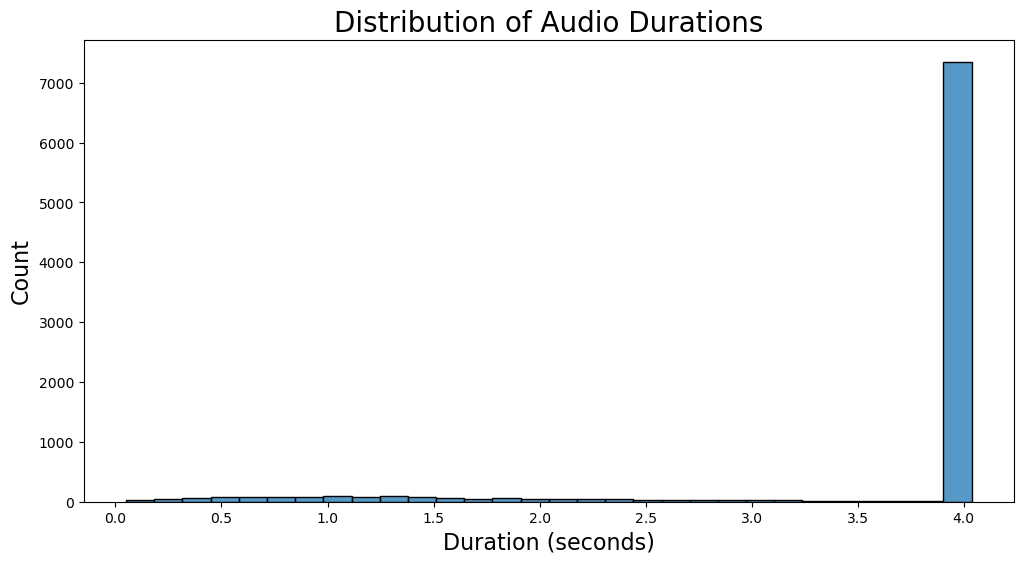

In [180]:
plt.figure(figsize=(12, 6))
sns.histplot(df['duration'], bins=30, kde=False, color='#1f77b4')
plt.title('Distribution of Audio Durations', fontsize=20)
plt.xlabel('Duration (seconds)', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show();

## Plot of Class and Average Duration:

In [188]:
class_duration = df.groupby('class')['duration'].mean().reset_index()
class_duration

class  duration
0   air_conditioner  3.994928
1          car_horn  2.456131
2  children_playing  3.962095
3          dog_bark  3.148285
4          drilling  3.546297
5     engine_idling  3.935953
6          gun_shot  1.647713
7        jackhammer  3.610735
8             siren  3.910315
9      street_music  4.000000

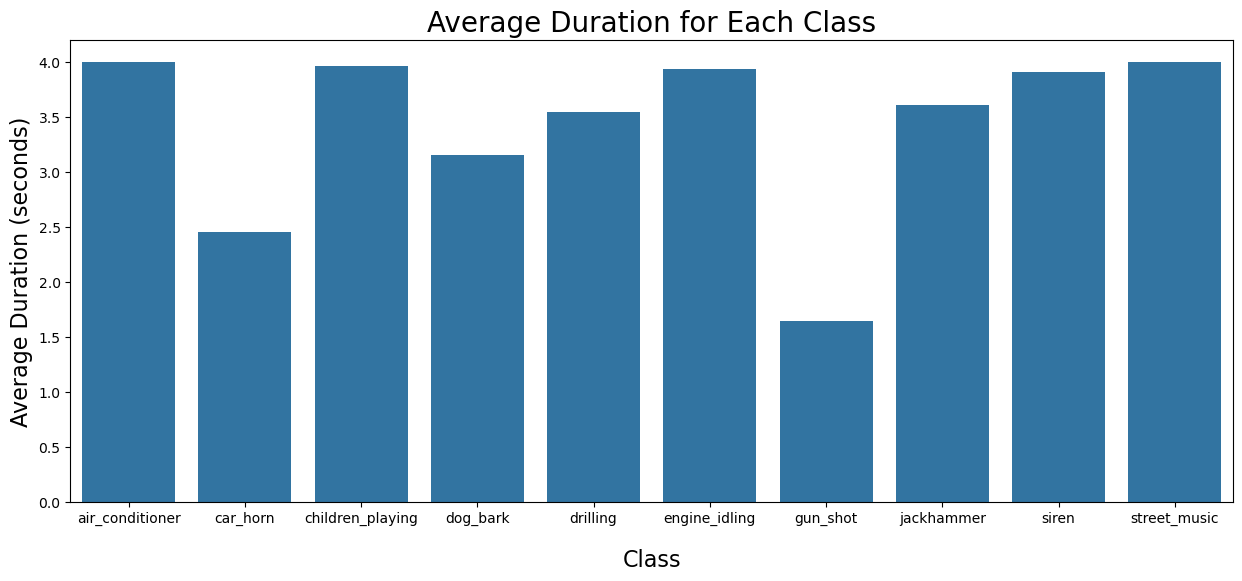

In [182]:
plt.figure(figsize=(15, 6))
ax = sns.barplot(x='class', y='duration', data=class_duration, color='#1f77b4')
plt.title('Average Duration for Each Class', fontsize=20)
plt.xlabel('Class', fontsize=16)
plt.ylabel('Average Duration (seconds)', fontsize=16)

ax.xaxis.set_label_coords(0.5, -0.1)

plt.show()

In [196]:
import pandas as pd
import soundfile as sf
import seaborn as sns
import matplotlib.pyplot as plt
import os
from tqdm import tqdm


# Define the function to construct the file path
def construct_file_path(row):
    base_dir = "./UrbanSound8K/audio"
    file_name = row["slice_file_name"]
    fold = row["fold"]
    file_path = os.path.join(base_dir, f'fold{fold}', file_name)
    return file_path

# Lists to hold the sampling rate, channels, and subtype
sampling_rates = []
channels = []
subtypes = []

# Iterate through each row in the DataFrame
for idx, row in tqdm(df.iterrows(), total=df.shape[0]):
    file_path = construct_file_path(row)
    try:
        info = sf.info(file_path)
        sampling_rates.append(info.samplerate)
        channels.append(info.channels)
        subtypes.append(info.subtype)
    except IOError:
        sampling_rates.append(None)
        channels.append(None)
        subtypes.append(None)

# Add the new columns to the DataFrame
df['Sampling_rate'] = sampling_rates
df['Channels'] = channels
df['Bit_rate'] = subtypes

100%|██████████████████████████████████████████████████████████████████████████████| 8732/8732 [02:13<00:00, 65.27it/s]


## Sampling_rate

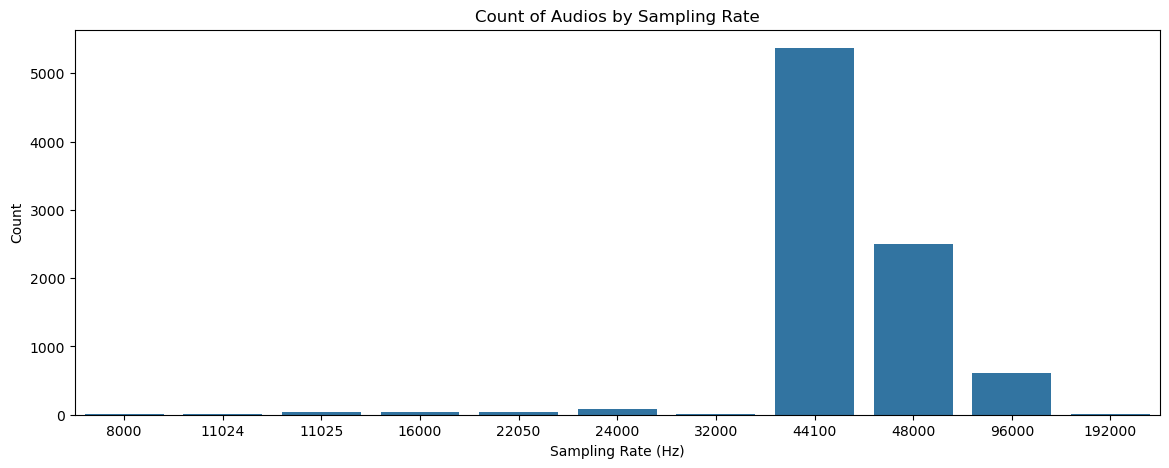

In [201]:
plt.figure(figsize=(14, 5))
sns.countplot(data=df, x='Sampling_rate',color='#1f77b4')
plt.title("Count of Audios by Sampling Rate")
plt.xlabel('Sampling Rate (Hz)')
plt.ylabel('Count')
plt.show()

## Channels

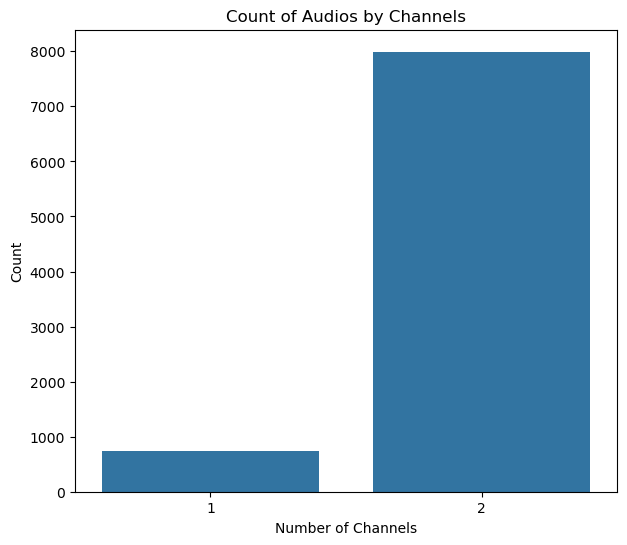

In [215]:
plt.figure(figsize=(7, 6))
sns.countplot(data=df, x='Channels',color='#1f77b4')
plt.title("Count of Audios by Channels")
plt.xlabel('Number of Channels')
plt.ylabel('Count')
plt.show()

## Bit_rate

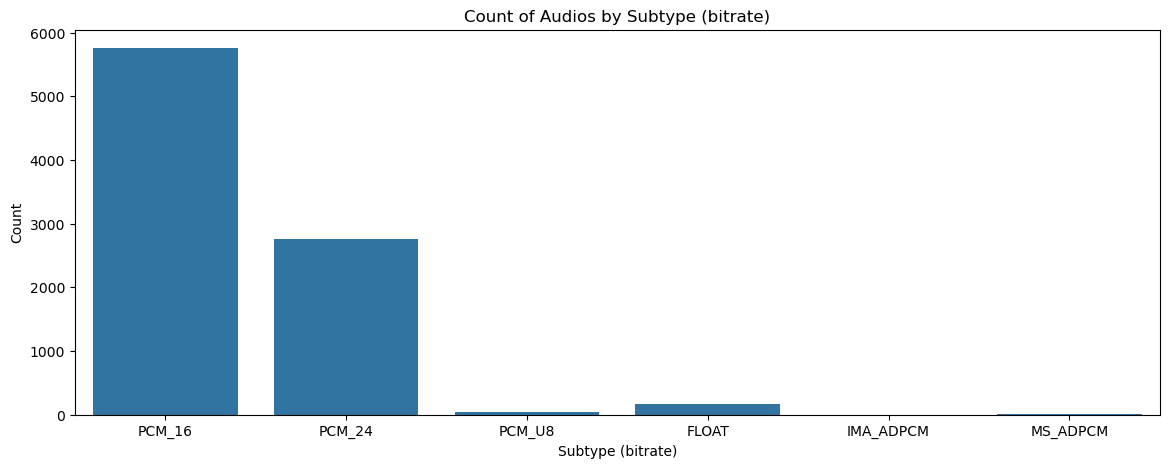

In [207]:
plt.figure(figsize=(14, 5))
sns.countplot(data=df, x='Bit_rate',color='#1f77b4')
plt.title("Count of Audios by Subtype (bitrate)")
plt.xlabel('Subtype (bitrate)')
plt.ylabel('Count')
plt.show()

## Display wave plots

In [17]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import pandas as pd

def display_random_audio_waveplot(df: pd.DataFrame) -> None:
    """
    Displays one random audio file's waveform for each unique class in a subplot.

    Args:
    df (pd.DataFrame): DataFrame containing audio file information, including 'class', 
                       'slice_file_name', and 'fold' columns.
    
    Returns:
    None
    """
    plt.figure(figsize=(15, 15))
    
    unique_classes = df['class'].unique()
    
    for i, cls in enumerate(unique_classes):
        # Select the first file for the current class
        file_info = df[df['class'] == cls].iloc[0]
        file_path = os.path.join('./UrbanSound8K/audio/fold' + str(file_info['fold']), file_info['slice_file_name'])
        
        # Load the audio file
        y, sr = librosa.load(file_path)
        
        # Display the waveform
        ax = plt.subplot(5, 2, i + 1)
        librosa.display.waveshow(y, sr=sr)
        plt.title(cls)

    plt.tight_layout()
    plt.show()

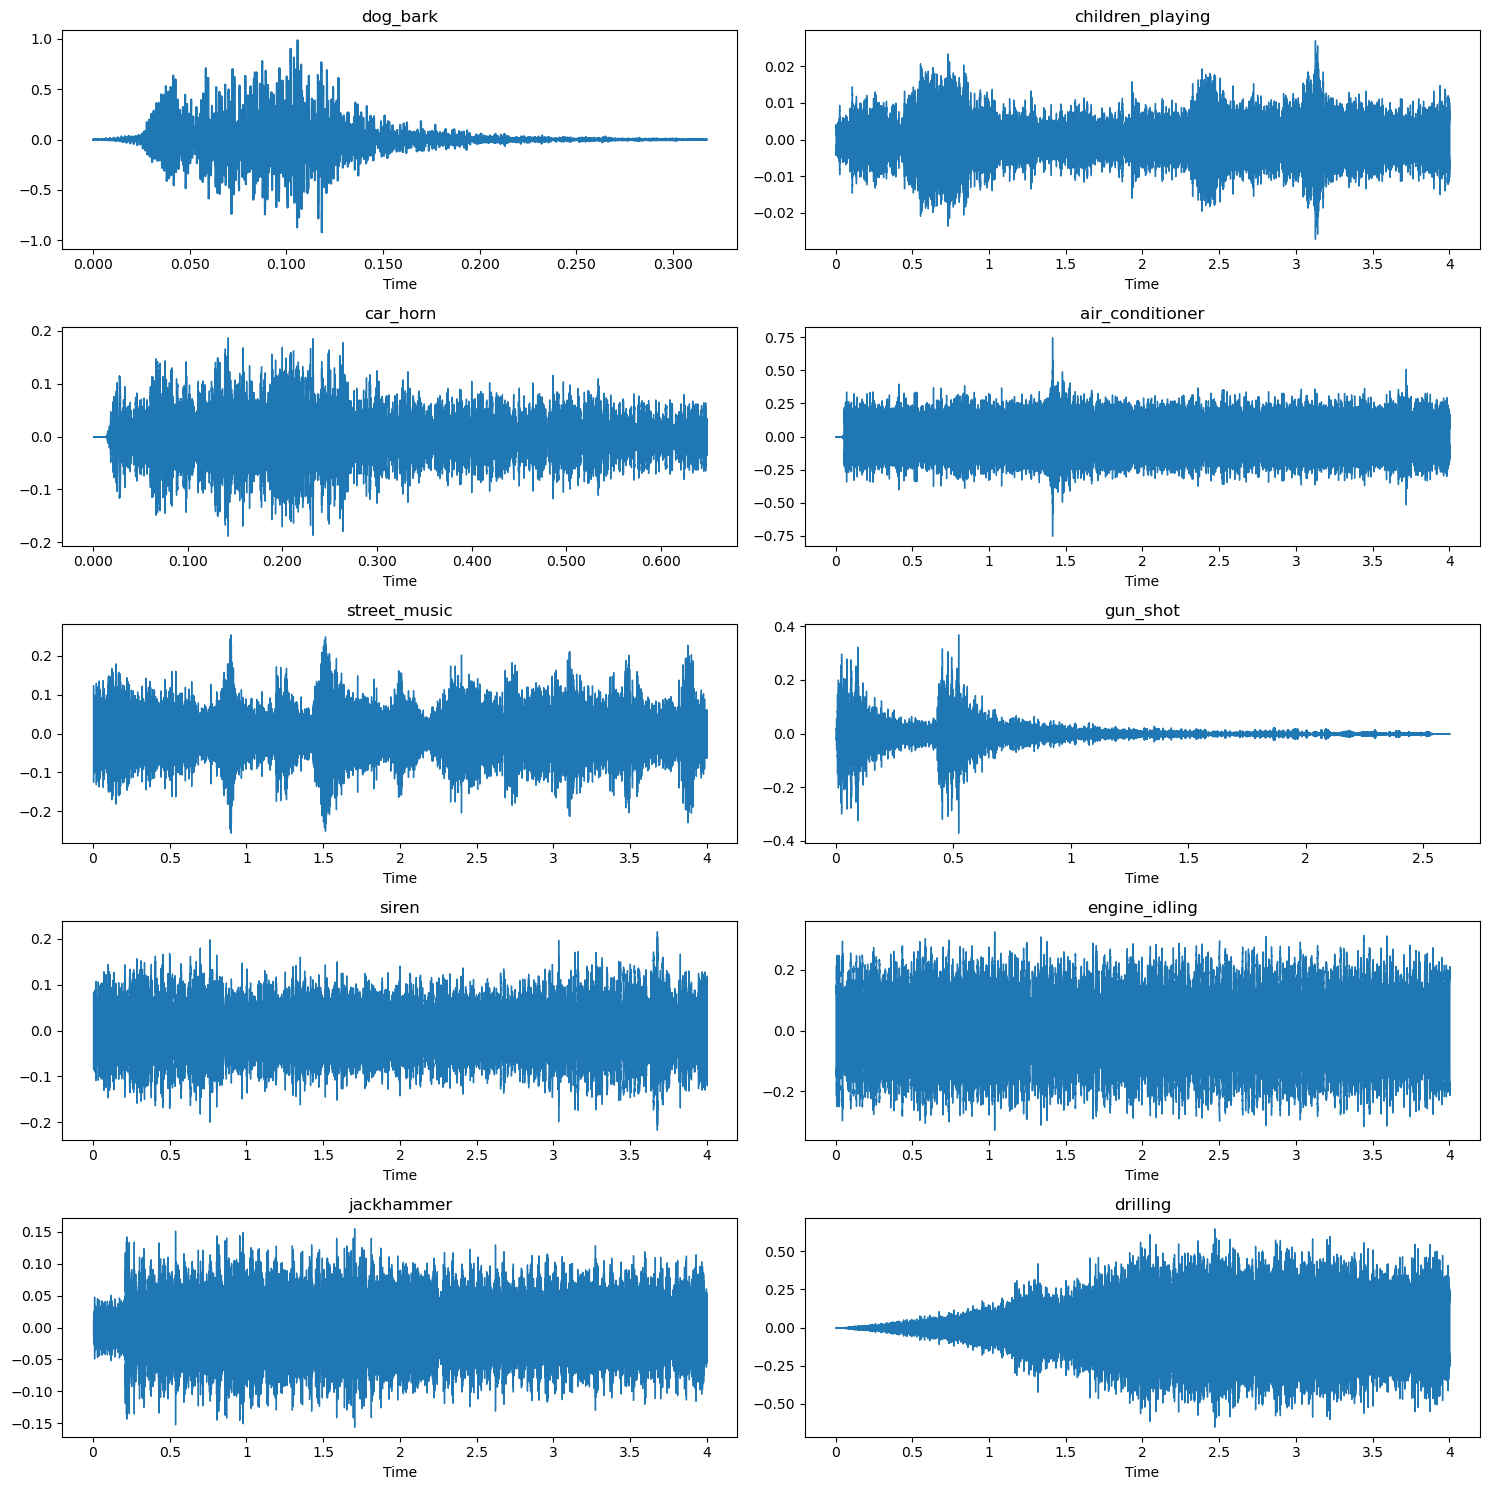

In [19]:
display_random_audio_waveplot(df)

## Display Spectorgram

In [21]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def display_random_audio_spectrograms(df: pd.DataFrame) -> None:
    """
    Displays one random audio file's mel-spectrogram for each unique class in a subplot.

    Args:
    df (pd.DataFrame): DataFrame containing audio file information, including 'class', 
                       'slice_file_name', and 'fold' columns.
    """
    plt.figure(figsize=(15, 15))
    
    for i, cls in enumerate(df['class'].unique()):
        # Select the first file for the current class
        file = df[df['class'] == cls]['slice_file_name'].values[0]
        fold = df[df['class'] == cls]['fold'].values[0]
        path = os.path.join('./UrbanSound8K/audio/fold' + str(fold), file)
        
        # Load the audio file
        y, sr = librosa.load(path)
        
        # Compute the mel-spectrogram
        S = librosa.feature.melspectrogram(y=y, sr=sr)
        
        # Display the mel-spectrogram
        ax = plt.subplot(5, 2, i + 1)
        librosa.display.specshow(librosa.power_to_db(S, ref=np.max), ax=ax)
        plt.title(cls)

    
    plt.tight_layout()
    plt.show()


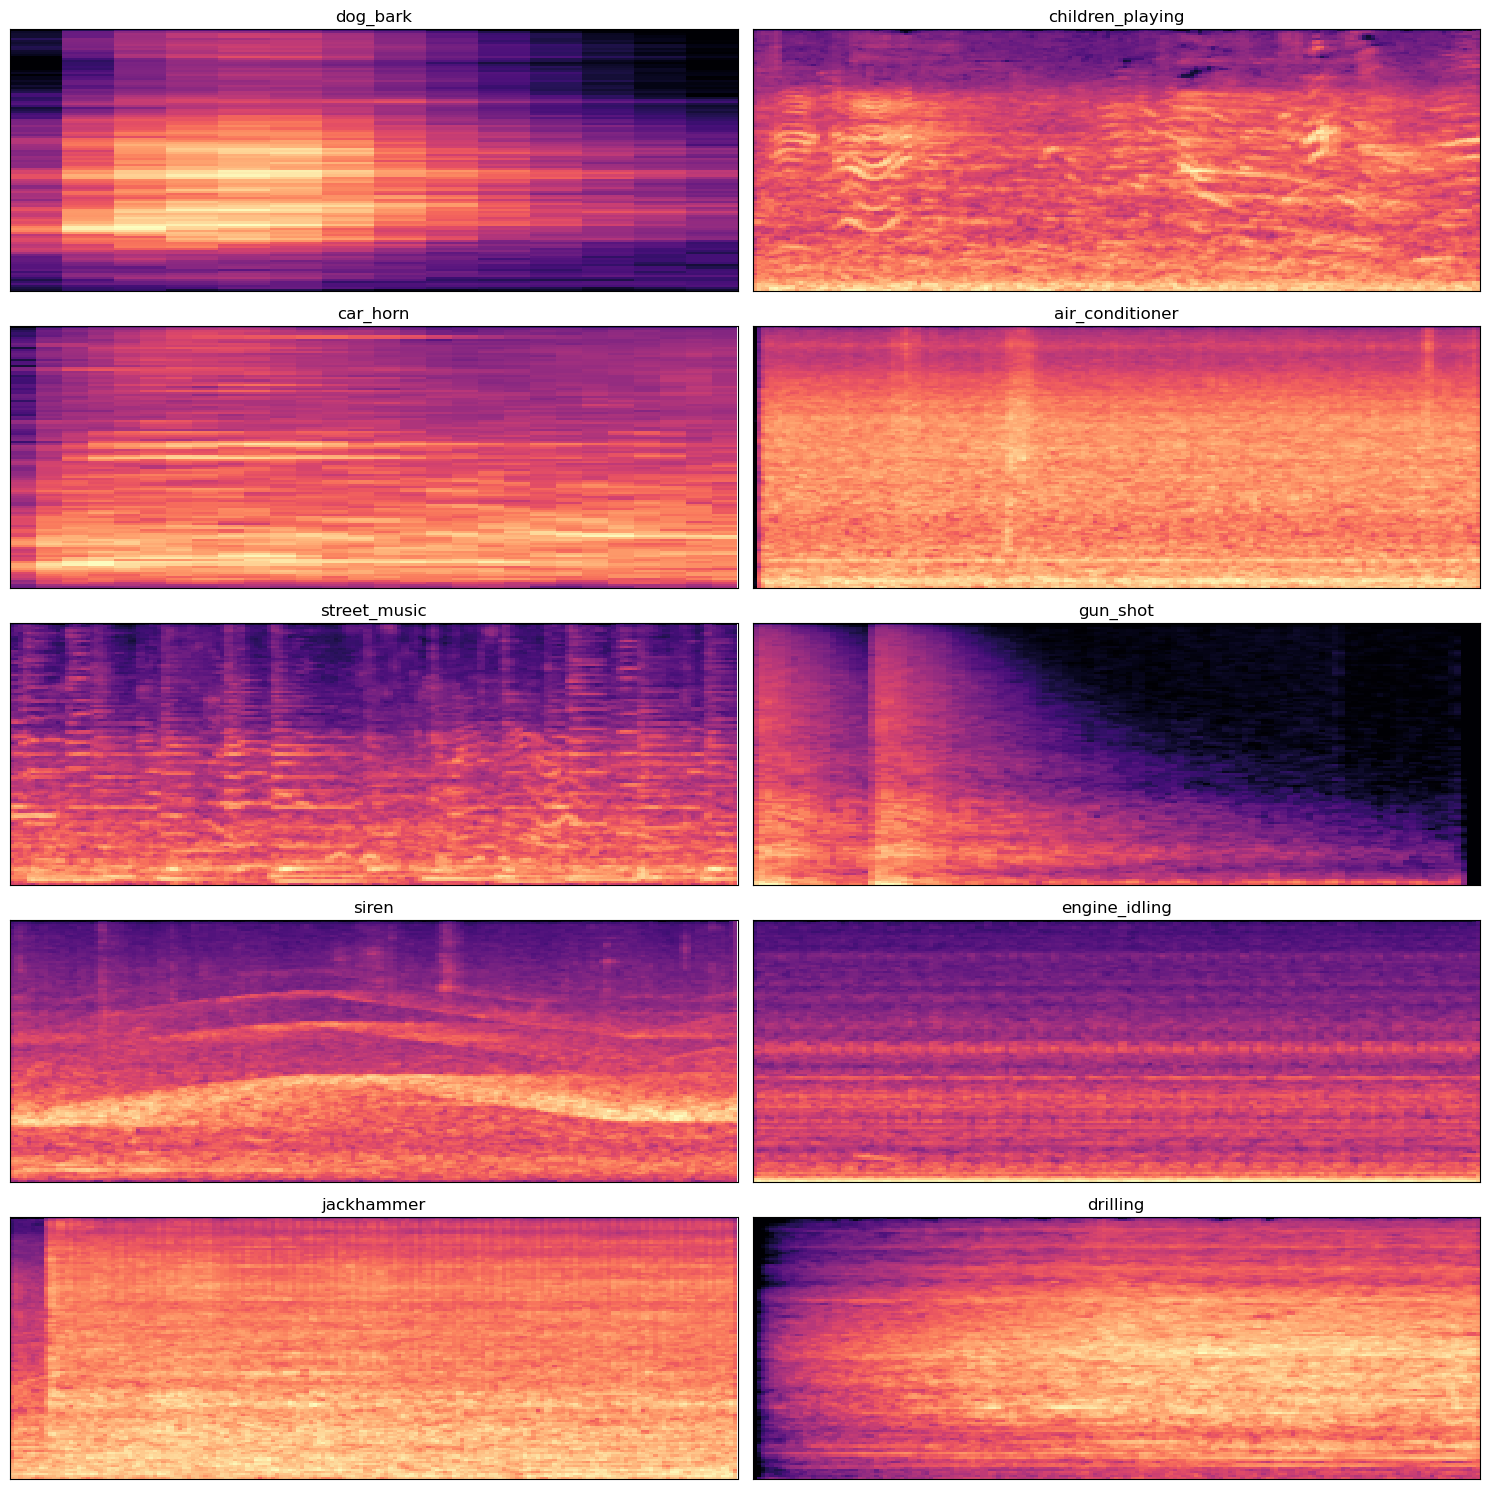

In [22]:
display_random_audio_spectrograms(df)

## augmentation-time stretch

Time stretching in audio classification means changing the speed or duration of an audio clip without affecting its pitch. This technique helps in data augmentation by creating new training samples, making the model more robust and better at recognizing sounds, even if they occur at different speeds.

In [36]:
def display_audio_augmentation_time_stretch(df: pd.DataFrame,rate=1.5) -> None:
    """
    Displays one audio file and its time-stretched version side-by-side for each unique class.

    Args:
    df (pd.DataFrame): DataFrame containing audio file information, including 'class', 
                       'slice_file_name', and 'fold' columns.
    """
    plt.figure(figsize=(15, 15))
    
    for i, cls in enumerate(df['class'].unique()):
        # Select the first file for the current class
        file = df[df['class'] == cls]['slice_file_name'].values[0]
        fold = df[df['class'] == cls]['fold'].values[0]
        path = os.path.join('./UrbanSound8K/audio/fold' + str(fold), file)
        
        # Load the audio file
        y, sr = librosa.load(path)

        # Display the original audio
        ax = plt.subplot(10, 2, i * 2 + 1)
        librosa.display.waveshow(y, sr=sr)
        plt.title(cls)
        
        # Apply time-stretching
        y_stretched = librosa.effects.time_stretch(y, rate=rate)

        # Display the time-stretched audio
        ax = plt.subplot(10, 2, i * 2 + 2)
        librosa.display.waveshow(y_stretched, sr=sr)
        plt.title(cls + ' (stretched)')
        
    plt.tight_layout()
    plt.show()

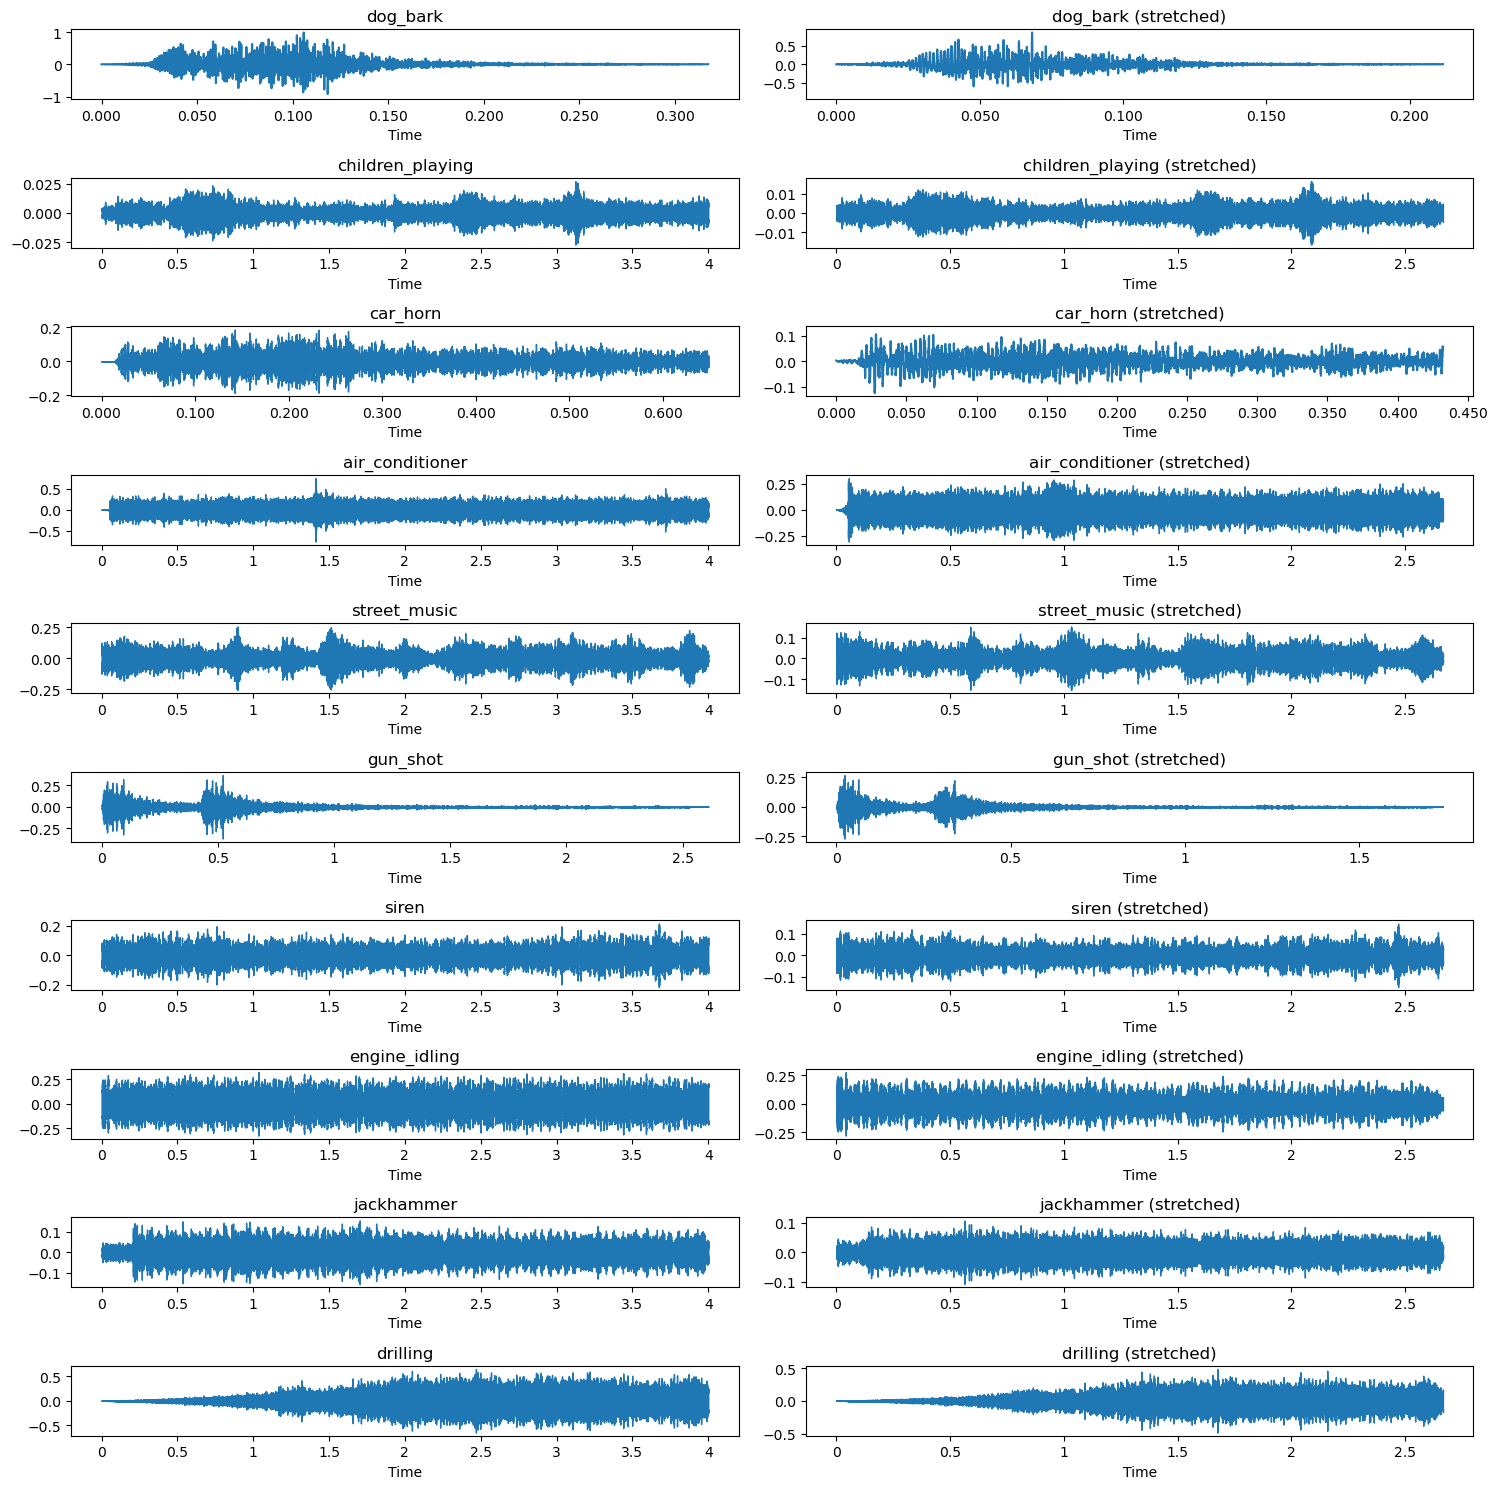

In [38]:
display_audio_augmentation_time_stretch(df,rate=1.5)

## augmentation-pitch shift

Pitch shifting in audio classification is a data augmentation technique where the pitch of an audio clip is changed without altering its speed. This creates new variations of the sound, helping the model learn to recognize sounds even if their pitch is higher or lower than the original, improving robustness.

In [41]:
def display_audio_augmentation_pitch_shift(df: pd.DataFrame,steps=4) -> None:
    """
    Displays one audio file and its time-shifted version side-by-side for each unique class.

    Args:
    df (pd.DataFrame): DataFrame containing audio file information, including 'class', 
                       'slice_file_name', and 'fold' columns.
    """
    plt.figure(figsize=(15, 15))
    
    for i, cls in enumerate(df['class'].unique()):
        # Select the first file for the current class
        file = df[df['class'] == cls]['slice_file_name'].values[0]
        fold = df[df['class'] == cls]['fold'].values[0]
        path = os.path.join('./UrbanSound8K/audio/fold' + str(fold), file)
        
        # Load the audio file   
        y, sr = librosa.load(path)
        
        # Display the original audio
        ax = plt.subplot(10, 2, i * 2 + 1)
        librosa.display.waveshow(y, sr=sr)
        plt.title(cls)
        
        # Apply time-shifting
        y_shifted = librosa.effects.pitch_shift(y, sr=sr, n_steps=steps)
        
        # Display the time-shifted audio
        ax = plt.subplot(10, 2, i * 2 + 2)
        librosa.display.waveshow(y_shifted, sr=sr)
        plt.title(cls + ' (shifted)')
        
    plt.tight_layout()
    plt.show()                              

### steps = 4

When steps=4: The pitch is shifted up by 4 semitones, meaning the audio will sound higher. For example, if the original audio has a note at C, it will now sound like an E (4 semitones higher)

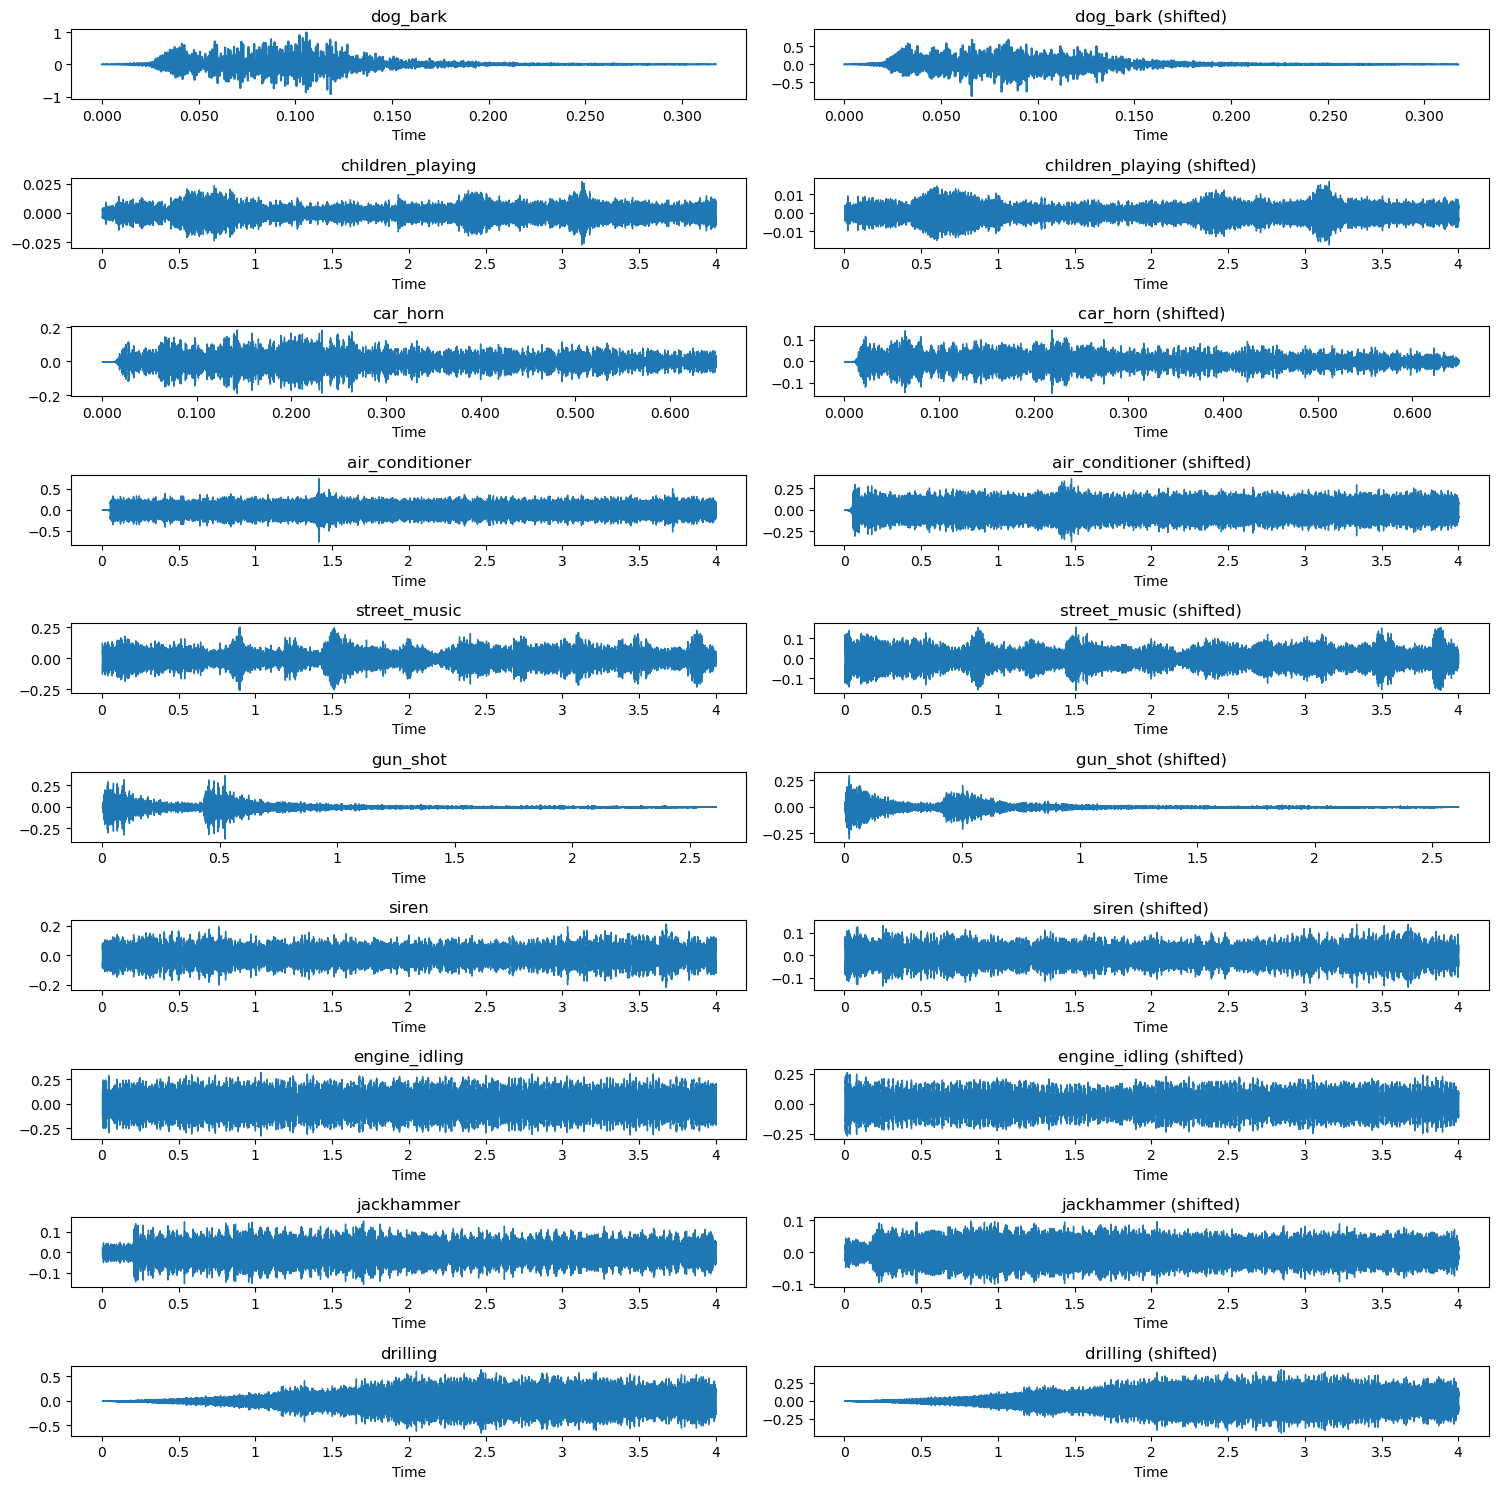

In [42]:
display_audio_augmentation_pitch_shift(df,steps=4)

## steps = -4

When steps=-4: The pitch is shifted down by 4 semitones, making the audio sound lower. For instance, the same note C would now sound like a G# (4 semitones lower).

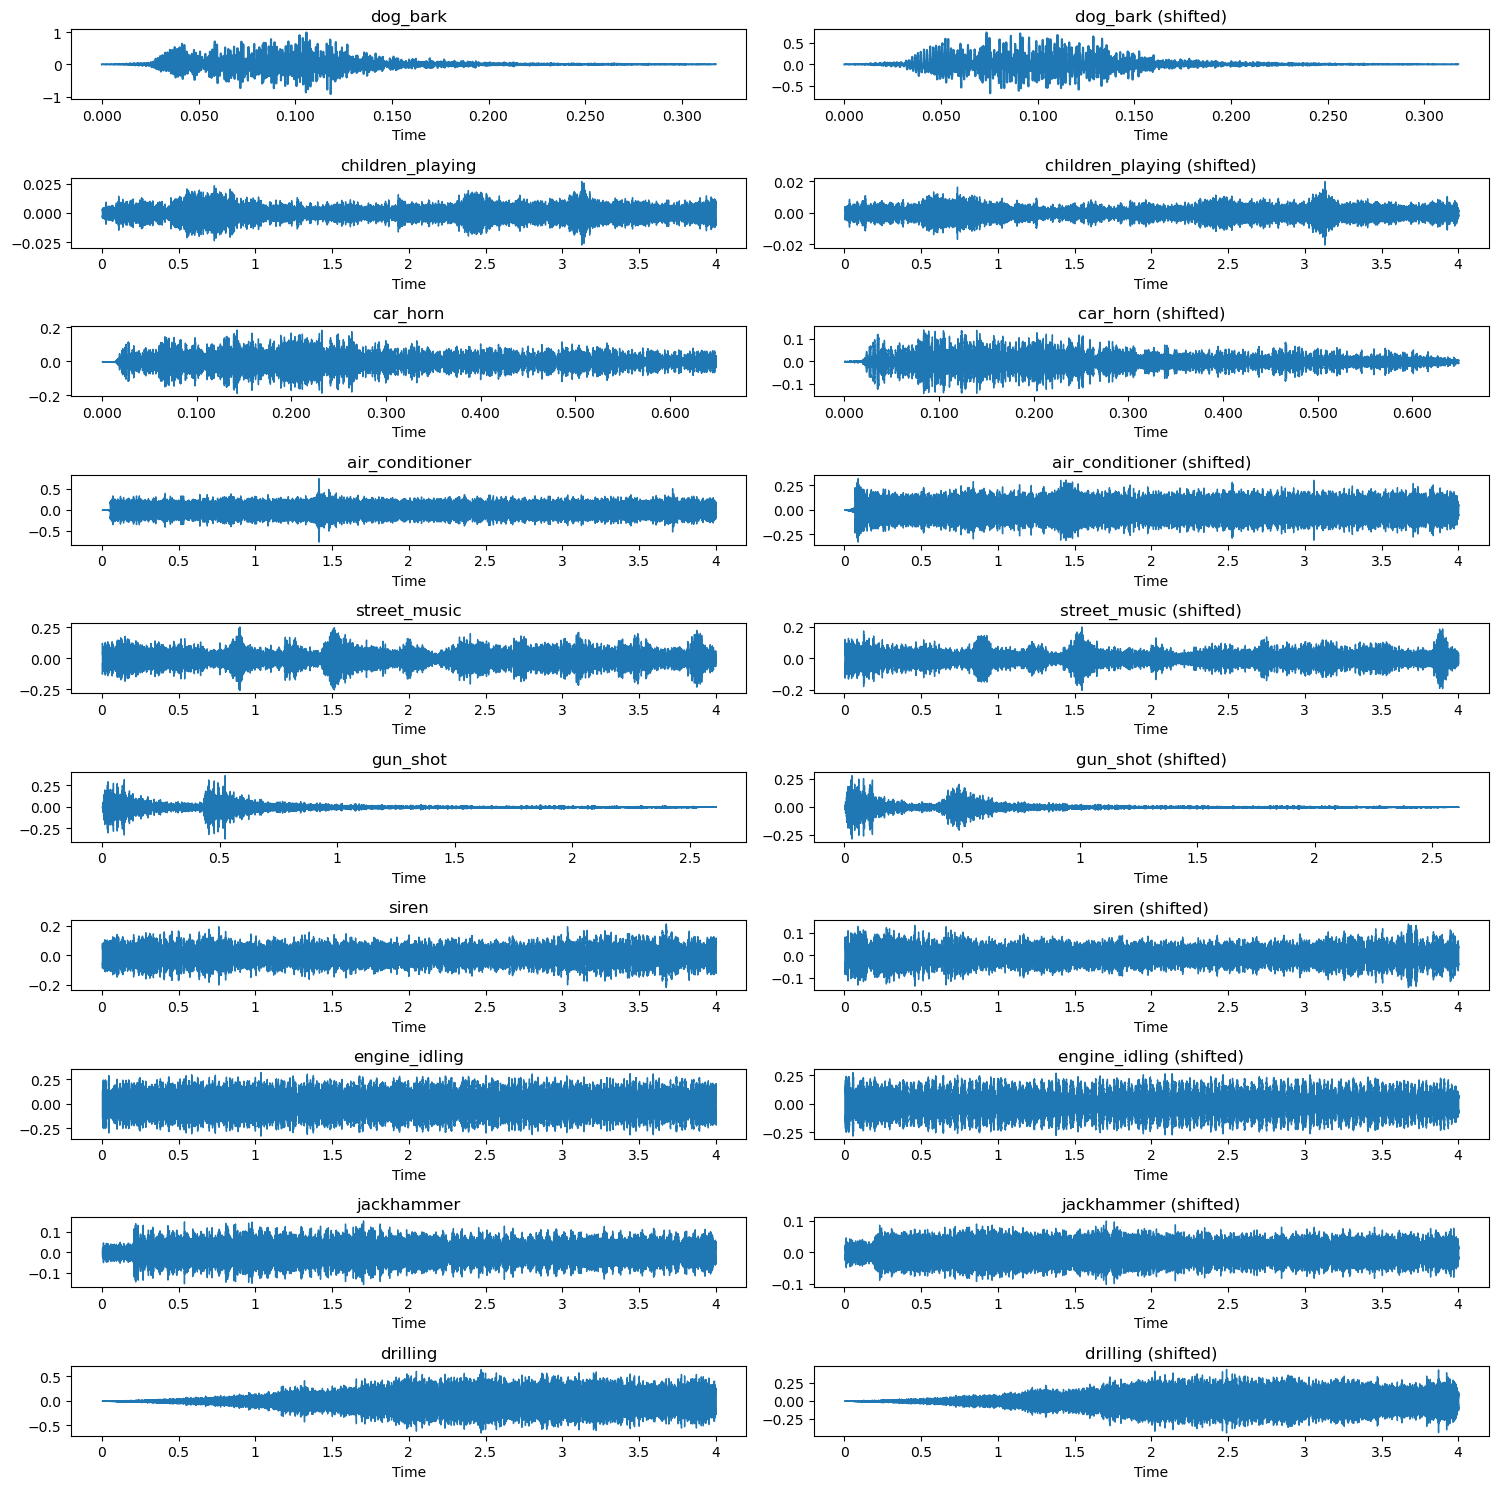

In [43]:
display_audio_augmentation_pitch_shift(df,steps=-4)

## augmentation-time shift

`time_shift` is a number that tells us how much to move an audio clip forward or backward in time. If the number is positive, it makes the audio play later, and if it's negative, it makes the audio play earlier. This is useful for changing the timing of sounds, which can help make audio recordings more varied and improve how well computers understand them


In [47]:
def display_audio_augmentation_time_shift(df: pd.DataFrame, shift: int) -> None:
    """
    Displays one audio file and its time-shifted version side-by-side for each unique class.

    Args:
    df (pd.DataFrame): DataFrame containing audio file information, including 'class', 
                       'slice_file_name', and 'fold' columns.
    shift (int): Number of samples to shift the audio. Positive values shift forward, negative values shift backward.
    """
    plt.figure(figsize=(15, 15))
    
    for i, cls in enumerate(df['class'].unique()):
        # Select the first file for the current class
        file = df[df['class'] == cls]['slice_file_name'].values[0]
        fold = df[df['class'] == cls]['fold'].values[0]
        path = os.path.join('./UrbanSound8K/audio/fold' + str(fold), file)
        
        # Load the audio file   
        y, sr = librosa.load(path)
        
        # Display the original audio
        ax = plt.subplot(10, 2, i * 2 + 1)
        librosa.display.waveshow(y, sr=sr)
        plt.title(cls)
        
        # Apply time-shifting
        y_shifted = np.roll(y, shift)
        
        # Display the time-shifted audio
        ax = plt.subplot(10, 2, i * 2 + 2)
        librosa.display.waveshow(y_shifted, sr=sr)
        plt.title(f"{cls} (shift by {shift} samples)")
        
    plt.tight_layout()
    plt.show() 

### time_shift = 1000

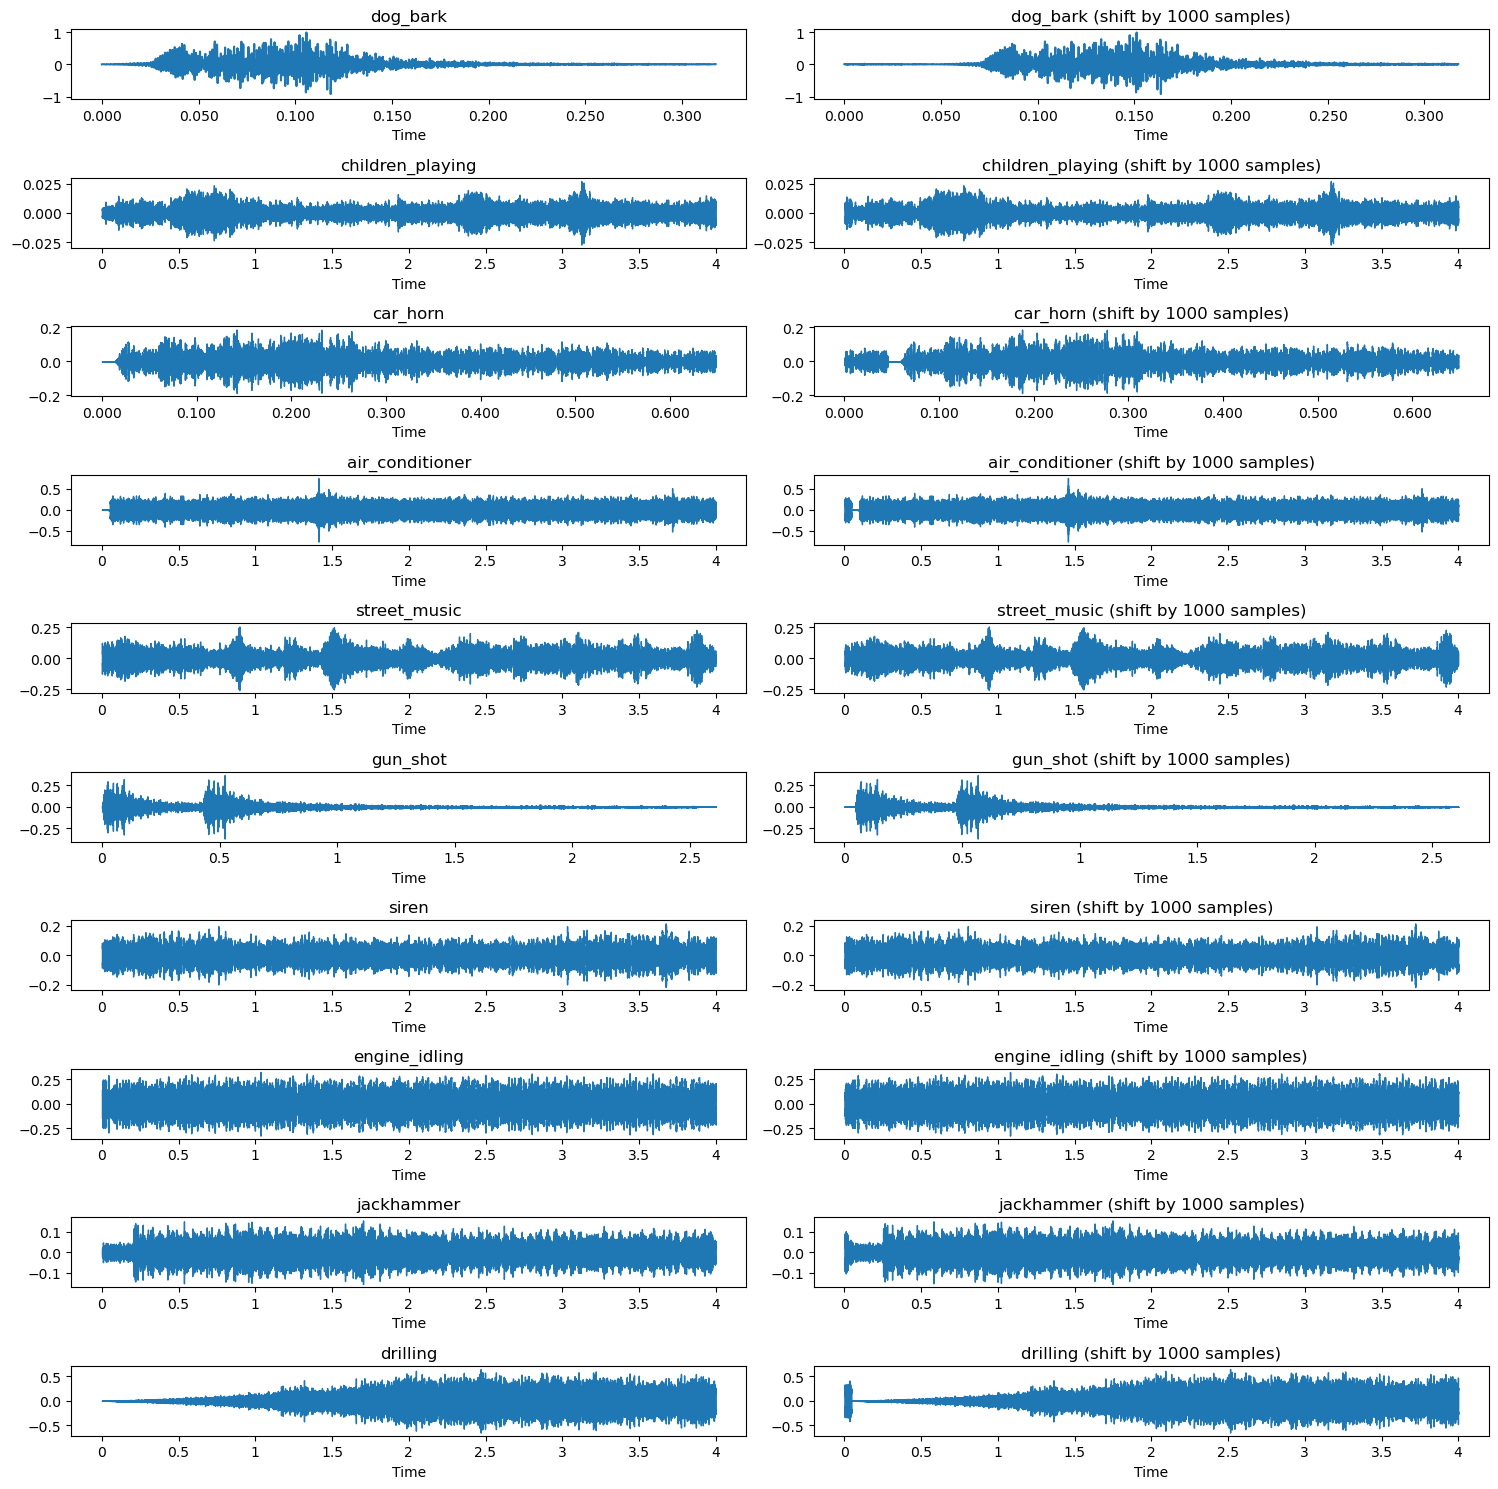

In [48]:
display_audio_augmentation_time_shift(df, shift=1000)

### time_shift = -1000

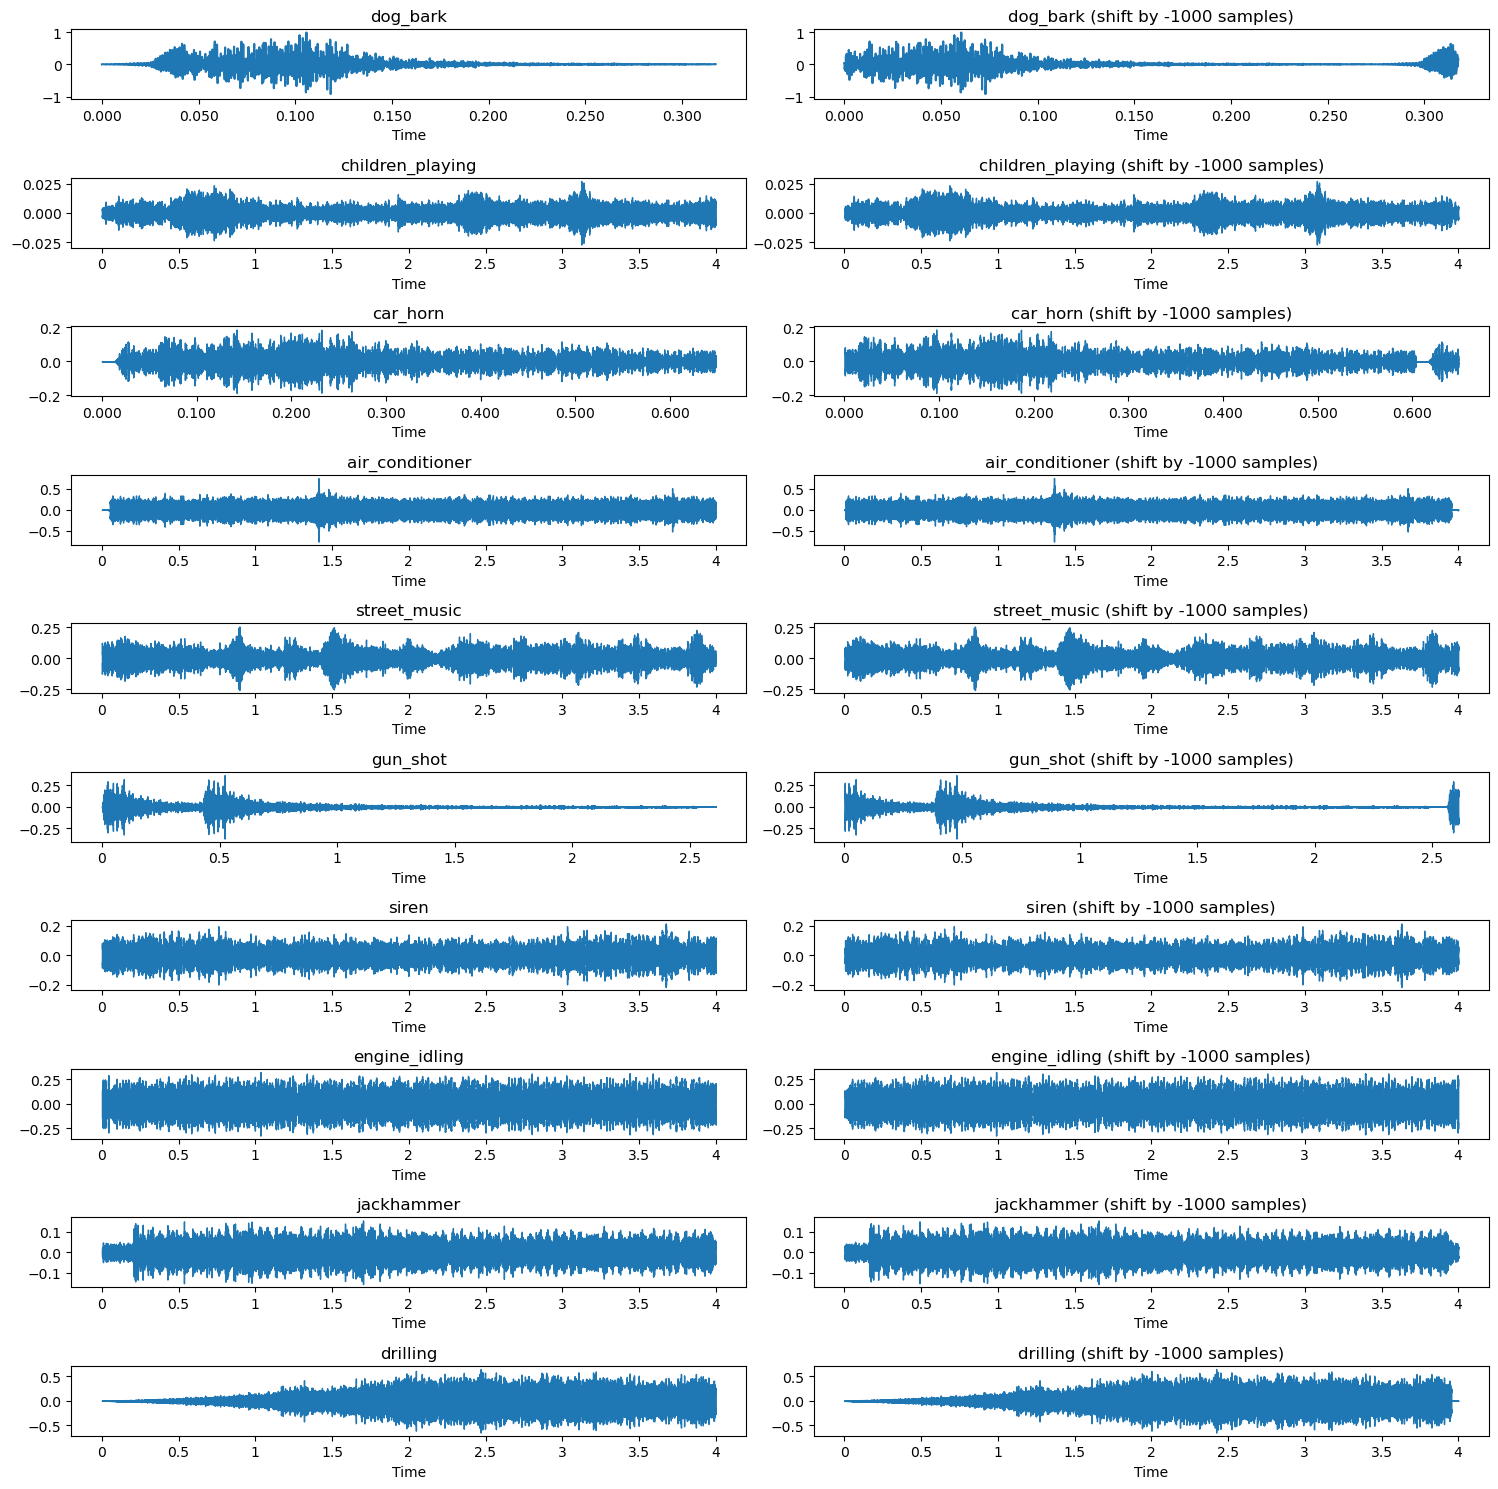

In [50]:
display_audio_augmentation_time_shift(df, shift=-1000)

## augmentation_random_gain

Random Gain augmentation is a technique used to adjust the volume of an audio clip by applying a random gain factor. This augmentation changes the loudness of the audio without altering the pitch or duration. It is helpful for making a model more robust to volume variations, such as quieter or louder recordings

In [51]:
def display_audio_augmentation_random_gain(df: pd.DataFrame, gain: float) -> None:
    """
    Displays one audio file and its gain-modified version side-by-side for each unique class.

    Args:
    df (pd.DataFrame): DataFrame containing audio file information, including 'class', 
                       'slice_file_name', and 'fold' columns.
    gain (float): Gain multiplier to apply to the audio.
    """
    plt.figure(figsize=(15, 15))
    
    for i, cls in enumerate(df['class'].unique()):
        # Select the first file for the current class
        file = df[df['class'] == cls]['slice_file_name'].values[0]
        fold = df[df['class'] == cls]['fold'].values[0]
        path = os.path.join('./UrbanSound8K/audio/fold' + str(fold), file)
        
        # Load the audio file   
        y, sr = librosa.load(path)
        
        # Display the original audio
        ax = plt.subplot(10, 2, i * 2 + 1)
        librosa.display.waveshow(y, sr=sr)
        plt.title(cls)
        
        # Apply gain
        y_gain = y * gain
        
        # Display the gain-modified audio
        ax = plt.subplot(10, 2, i * 2 + 2)
        librosa.display.waveshow(y_gain, sr=sr)
        plt.title(f"{cls} (gain x{gain})")
        
    plt.tight_layout()
    plt.show()

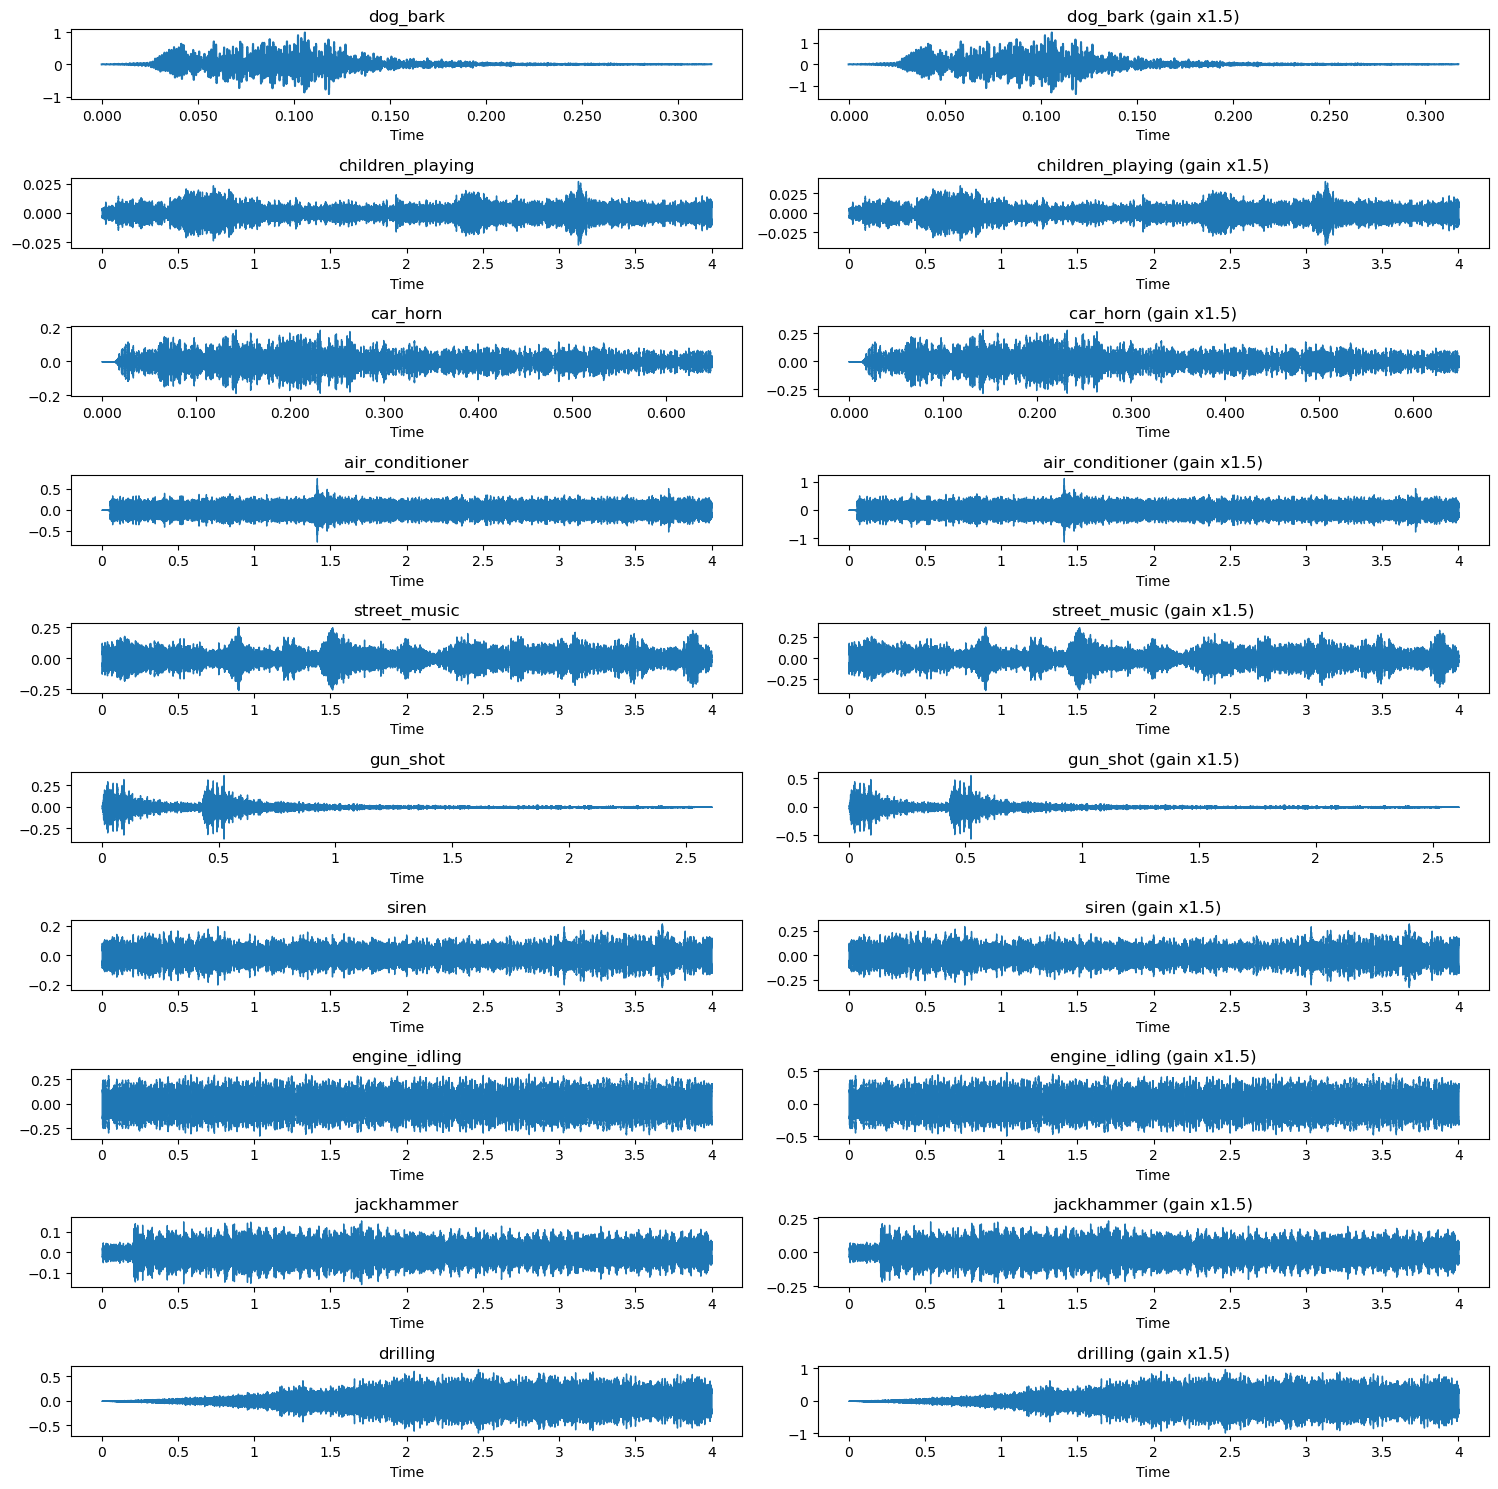

In [52]:
display_audio_augmentation_random_gain(df, gain=1.5)

In [123]:
import numpy as np
from tqdm import tqdm
import pandas as pd
import os
import IPython.display as ipd

def display_random_audios_from_df(classID,examples):
    df = pd.read_csv('./UrbanSound8K.csv')
    
    for index_num,row in tqdm(df[df['classID']==classID].sample(examples).iterrows()):
        file_name = os.path.join(os.path.abspath('./UrbanSound8K/audio/'),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
        display(ipd.Audio(filename=file_name))

In [127]:
display_random_audios_from_df(3,2)

0it [00:00, ?it/s]

1it [00:00,  9.08it/s]

2it [00:00, 10.73it/s]


In [137]:

def random_audio_path():
    def construct_file_path(row):
        base_dir = "./UrbanSound8K/audio/"
        file_name = row["slice_file_name"]
        fold = row["fold"]
        file_path = os.path.join(base_dir, f'fold{fold}', file_name)
        return file_path

    
    # Sample a random row from the DataFrame
    random_row = df.sample(n=1).iloc[0]
    
    # Construct the file path for the sampled row
    file_path = construct_file_path(random_row)
    
    # Display the file path (for debugging or verification purposes)
    return file_path

In [139]:
random_audio_path()

'./UrbanSound8K/audio/fold3\\93065-9-0-4.wav'

In [141]:
import soundfile as sf

def describe_audio(audio_path):
    # Open the audio file
    audio_file_path = audio_path
    data, samplerate = sf.read(audio_file_path)
    
    # Get audio file information
    info = sf.info(audio_file_path)
    
    # Print the information
    print(f"Sampling rate: {info.samplerate} Hz")
    print(f"Channels: {info.channels}")
    print(f"Subtype (bitrate): {info.subtype}")

In [143]:
describe_audio(random_audio_path())

Sampling rate: 48000 Hz
Channels: 1
Subtype (bitrate): PCM_24


In [145]:
describe_audio(random_audio_path())

Sampling rate: 44100 Hz
Channels: 2
Subtype (bitrate): PCM_16
